In [2]:
import numpy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math

In [4]:

# 這部分是為了畫出對照圖驗證程式

def cacudegree(x2,y2,x1,y1):
    """
    計算文字框傾斜角度，用下面的兩點計算，用來輸出成 robndbox xml 的數值
    DBNet格式 p1,p2,p3,p4 , roLabelImg 格式 cx,cy,w,h,angle 所以要計算角度
    x2,y2,x1,y1 看起來是 後、前 兩點，實際上輸入是 前、後 x3,y3,x4,y4 兩點
    """
    import math
    degree=math.atan2(-y2-(-y1),x2-x1)
    degree=math.degrees(degree)
#     degree=math.degrees()    
    return degree

def euclideanDistance(x1,y1,x2,y2):
    """
    DBNet格式 p1,p2,p3,p4 
    用來計算文字框的 w,h 轉成 roLabelImg 格式 cx,cy,w,h,angle 所以要計算 w,h
    """
    return math.sqrt(((x1-x2)**2)+((y1-y2)**2) )

In [5]:
help(euclideanDistance)
help(cacudegree)

Help on function euclideanDistance in module __main__:

euclideanDistance(x1, y1, x2, y2)
    DBNet格式 p1,p2,p3,p4 
    用來計算文字框的 w,h 轉成 roLabelImg 格式 cx,cy,w,h,angle 所以要計算 w,h

Help on function cacudegree in module __main__:

cacudegree(x2, y2, x1, y1)
    計算文字框傾斜角度，用下面的兩點計算，用來輸出成 robndbox xml 的數值
    DBNet格式 p1,p2,p3,p4 , roLabelImg 格式 cx,cy,w,h,angle 所以要計算角度
    x2,y2,x1,y1 看起來是 後、前 兩點，實際上輸入是 前、後 x3,y3,x4,y4 兩點



In [8]:
rst = []
with open("test/presentation_032.txt") as file:
    for line in file: 
        line = [round(float(line),2) for line in line.replace('\n','').split(',')]
        rst.append(line) #storing everything in memory!
rst[:5]

[[140.0, 589.0, 169.0, 589.0, 169.0, 596.0, 140.0, 596.0, 0.44],
 [184.0, 587.0, 383.0, 587.0, 383.0, 597.0, 184.0, 597.0, 0.58],
 [83.0, 588.0, 118.0, 586.0, 119.0, 595.0, 84.0, 597.0, 0.49],
 [395.0, 586.0, 459.0, 586.0, 459.0, 597.0, 395.0, 597.0, 0.57],
 [426.0, 566.0, 460.0, 566.0, 460.0, 574.0, 426.0, 574.0, 0.55]]

551 779


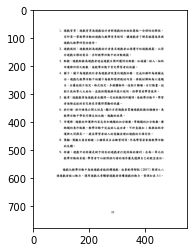

In [9]:
im = plt.imread("test/presentation_032.jpg")
plt.imshow(im)
hh,ww,_ = im.shape
print(ww,hh)

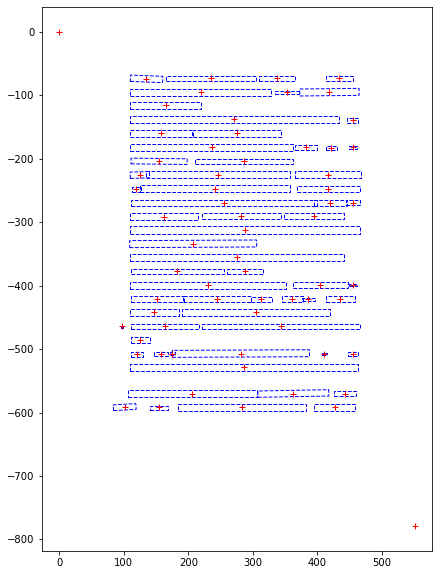

In [10]:
fig, ax = plt.subplots(figsize = (7, 10))
ax.plot([0,ww],[0,-hh], 'r+')
# ax.imshow(im)
for x1,y1,x2,y2,x3,y3,x4,y4,_ in rst:
    ox1,oy1,ox2,oy2,ox3,oy3,ox4,oy4 = float(x1),float(y1),float(x2),float(y2),float(x3),float(y3),float(x4),float(y4)
    x1,y1,x2,y2,x3,y3,x4,y4 = float(x1),float(y1)*-1,float(x2),float(y2)*-1,float(x3),float(y3)*-1,float(x4),float(y4)*-1
#     print((x1,y1,x2,y2), euclideanDistance(ox1,oy1,ox2,oy2), euclideanDistance(ox2,oy2,ox3,oy3), cacudegree(ox1,oy1,ox2,oy2))
    # 從 p4 為起點開始畫文字框，
    ax.add_patch(Rectangle((x4,y4), euclideanDistance(ox1,oy1,ox2,oy2), euclideanDistance(ox2,oy2,ox3,oy3), \
                           cacudegree(ox3,oy3,ox4,oy4), fill=False, linewidth=1, color='BLUE', linestyle='--'))
    # p1,p2 計算 w, p2,p3 計算 h
    ax.plot(int((max(x1,x2,x3,x4)+min(x1,x2,x3,x4))/2),int((max(y1,y2,y3,y4)+min(y1,y2,y3,y4))/2), 'r+')
plt.show()

In [338]:
import glob
from xml.etree.ElementTree import ElementTree
# from xml.etree.ElementTree import Element
from xml.etree.ElementTree import SubElement
import xml.etree.ElementTree as ET
import numpy
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import math

In [339]:
def cacudegree_xml(x4,y4,x3,y3):
    """
    計算文字框傾斜角度，用下面的兩點計算，用來輸出成 robndbox xml 的數值
    DBNet格式 p1,p2,p3,p4 , roLabelImg 格式 cx,cy,w,h,angle 所以要計算角度
    x2,y2,x1,y1 看起來是 後、前 兩點，實際上輸入是 前、後 x3,y3,x4,y4 兩點
    """
    angle=math.atan2(y3-y4,x3-x4)
#     degree=math.degrees(degree)
#     degree=math.degrees()    
    return angle

In [340]:
txt_files = glob.glob('..\\anno_img_dataset\\先探週刊第222期拜登訪台積電信賴產業鏈值千金2022-12-08i\\*.txt')
# txt_files[0]

In [344]:
for tf in txt_files[:1]:
    rst = []
    filename = tf.split('\\')[-1].split('.txt')[0]
    imgname = tf.split(filename)[0]+filename+'.jpg'
    print(filename)
    print(imgname)
    with open(tf) as file:
        for line in file: 
            line = [round(float(line),2) for line in line.replace('\n','').split(',')]
            rst.append(line) #storing everything in memory!

先探週刊第222期拜登訪台積電信賴產業鏈值千金2022-12-08i_001
..\anno_img_dataset\先探週刊第222期拜登訪台積電信賴產業鏈值千金2022-12-08i\先探週刊第222期拜登訪台積電信賴產業鏈值千金2022-12-08i_001.jpg


In [345]:
# rst

In [346]:
'''
因為要填入園圖像大小 ww,hh,dd 如 (1000,1200,3)，所以需要讀取圖像(jpg)來產生xml的資料
作用為當 robndbox xml 要轉成 4 point dbnet annotation txt 要用原圖像尺寸計算位置，就不用再次讀取影像
'''

for tf in txt_files:
    rst = []  # init annotation list
    filename = tf.split('\\')[-1].split('.txt')[0]  # anntation txt file name
    imgname = tf.split(filename)[0]+filename+'.jpg'  # image name for get img shape
    im = plt.imread(imgname)
#     plt.imshow(im)
    hh,ww,dd = im.shape
#     print(ww,hh)    
    with open(tf) as file:
        for line in file: 
            line = [round(float(line),2) for line in line.replace('\n','').split(',')]
            rst.append(line) #storing everything in memory!
          
        a = ET.Element('annotation')
        b = ET.SubElement(a, 'folder').text = "unknow"
        b = ET.SubElement(a, 'filename').text = '%s' % filename
        b = ET.SubElement(a, 'path').text = 'unknow'
        b = ET.SubElement(a, 'source')
        c = ET.SubElement(b, 'database').text = 'unknow'
        b = ET.SubElement(a, 'size')
        c = ET.SubElement(b, 'width').text = '%d' % ww
        c = ET.SubElement(b, 'height').text = '%d' % hh
        c = ET.SubElement(b, 'depth').text = '%d' % dd
        b = ET.SubElement(a, 'segmented').text = '0'    

        # =====================================
        for x1,y1,x2,y2,x3,y3,x4,y4,_ in rst: 
            cx, cy = float((max(x1,x2,x3,x4)+min(x1,x2,x3,x4))/2), float((max(y1,y2,y3,y4)+min(y1,y2,y3,y4))/2)
            w, h = float(euclideanDistance(x1,y1,x2,y2)), float(euclideanDistance(x2,y2,x3,y3))
            angle = cacudegree_xml(x4,y4,x3,y3)
            b = ET.SubElement(a, 'object')
            c = ET.SubElement(b, 'type').text = 'robndbox'
            c = ET.SubElement(b, 'name').text = 'words'
            c = ET.SubElement(b, 'pose').text = 'Unspecified'
            c = ET.SubElement(b, 'truncated').text = '0'
            c = ET.SubElement(b, 'difficult').text = '0'
            c = ET.SubElement(b, 'robndbox')
            d = ET.SubElement(c, 'cx').text = '%d' % cx
            d = ET.SubElement(c, 'cy').text = '%d' % cy
            d = ET.SubElement(c, 'w').text = '%d' % w
            d = ET.SubElement(c, 'h').text = '%d' % h
            d = ET.SubElement(c, 'angle').text = '%f' % angle

        ### =============================================
        ET.indent(a, space='  ', level=0)
        tree = ElementTree(a)
        # ET.dump(a)

        with open('..\\anno_img_dataset\\先探週刊第222期拜登訪台積電信賴產業鏈值千金2022-12-08i\\{}.xml'.format(filename), 'w') as f:
            tree.write(f, encoding='unicode')    

In [275]:
from xml.etree.ElementTree import ElementTree
# from xml.etree.ElementTree import Element
from xml.etree.ElementTree import SubElement
import xml.etree.ElementTree as ET


a = ET.Element('annotation')
b = ET.SubElement(a, 'folder').text = "unknow"
b = ET.SubElement(a, 'filename').text = 'unknow'
b = ET.SubElement(a, 'path').text = 'unknow'
b = ET.SubElement(a, 'source')
c = ET.SubElement(b, 'database').text = 'unknow'
b = ET.SubElement(a, 'size')
c = ET.SubElement(b, 'width').text = '12'
c = ET.SubElement(b, 'height').text = '12'
c = ET.SubElement(b, 'depth').text = '12'
b = ET.SubElement(a, 'segmented').text = '0'

# =====================================
for x1,y1,x2,y2,x3,y3,x4,y4,_ in rst: 
    cx, cy = float((max(x1,x2,x3,x4)+min(x1,x2,x3,x4))/2), float((max(y1,y2,y3,y4)+min(y1,y2,y3,y4))/2)
    w, h = float(euclideanDistance(x1,y1,x2,y2)), float(euclideanDistance(x2,y2,x3,y3))
    angle = cacudegree_xml(x4,y4,x3,y3)
#     angle = 0
    b = ET.SubElement(a, 'object')
    c = ET.SubElement(b, 'type').text = 'robndbox'
    c = ET.SubElement(b, 'name').text = 'words'
    c = ET.SubElement(b, 'pose').text = 'Unspecified'
    c = ET.SubElement(b, 'truncated').text = '0'
    c = ET.SubElement(b, 'difficult').text = '0'
    c = ET.SubElement(b, 'robndbox')
    d = ET.SubElement(c, 'cx').text = '%d' % cx
    d = ET.SubElement(c, 'cy').text = '%d' % cy
    d = ET.SubElement(c, 'w').text = '%d' % w
    d = ET.SubElement(c, 'h').text = '%d' % h
    d = ET.SubElement(c, 'angle').text = '%f' % angle

### =============================================
ET.indent(a, space='  ', level=0)
tree = ElementTree(a)
# ET.dump(a)


with open('adj_sample_001_result.xml', 'w') as f:
    tree.write(f, encoding='unicode')
    


# ET.dump(a)

In [281]:
print('math.atan2(y,x)')
print('x > 0 , y = 0 ',math.atan2(0,1))
print('x < 0 , y = 0 ',math.atan2(0,-1))
print('y > 0 , x = 0 ',math.atan2(1,0))
print('y < 0 , x = 0 ',math.atan2(-1,0))
print('x > 0 , y = 0 ',math.atan2(0,1)/math.pi)
print('x < 0 , y = 0 ',math.atan2(0,-1)/math.pi)
print('y > 0 , x = 0 ',math.atan2(1,0)/math.pi)
print('y < 0 , x = 0 ',math.atan2(-1,0)/math.pi)
print('介於 pi and -pi 之間')

math.atan2(y,x)
x > 0 , y = 0  0.0
x < 0 , y = 0  3.141592653589793
y > 0 , x = 0  1.5707963267948966
y < 0 , x = 0  -1.5707963267948966
x > 0 , y = 0  0.0
x < 0 , y = 0  1.0
y > 0 , x = 0  0.5
y < 0 , x = 0  -0.5
介於 pi and -pi 之間
